In [ ]:
!pip3 install --upgrade jupyter ipywidgets
!pip3 install diffusers accelerate safetensors transformers pillow opencv-contrib-python controlnet_aux matplotlib mediapipe
!pip3 install protobuf==3.20.1

  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached controlnet_aux-0.0.9-py3-none-any.whl.metadata (6.5 kB)
  Using cached mediapipe-0.10.18-cp39-cp39-macosx_11_0_universal2.whl.metadata (9.7 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached einops-0.8.0-py3-none-any.whl.metadata (12 kB)
  Using cached timm-0.6.7-py3-none-any.whl.metadata (33 kB)
  Using cached scikit_image-0.24.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (14 kB)
  Using cached jax-0.4.30-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.30-cp39-cp39-macosx_11_0_arm64.whl.metadata (1.0 kB)
  Using cached protobuf-4.25.5-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl.metadata (1.4 kB)
  Using cached sentencepiece-0.2.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached ml_dtype

In [1]:
from PIL import Image
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image

In [2]:
from transformers import AutoImageProcessor, UperNetForSemanticSegmentation
import numpy as np



In [3]:
palette = np.asarray([ [0, 0, 0], [120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50], [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255], [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7], [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82], [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3], [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255], [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220], [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224], [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255], [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7], [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153], [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255], [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0], [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255], [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255], [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255], [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0], [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0], [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255], [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255], [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20], [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255], [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255], [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255], [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0], [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0], [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255], [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112], [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160], [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163], [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0], [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0], [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255], [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204], [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255], [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255], [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194], [102, 255, 0], [92, 0, 255], ])

In [26]:
image_processor = AutoImageProcessor.from_pretrained("openmmlab/upernet-convnext-small")
image_segmentor = UperNetForSemanticSegmentation.from_pretrained("openmmlab/upernet-convnext-small")

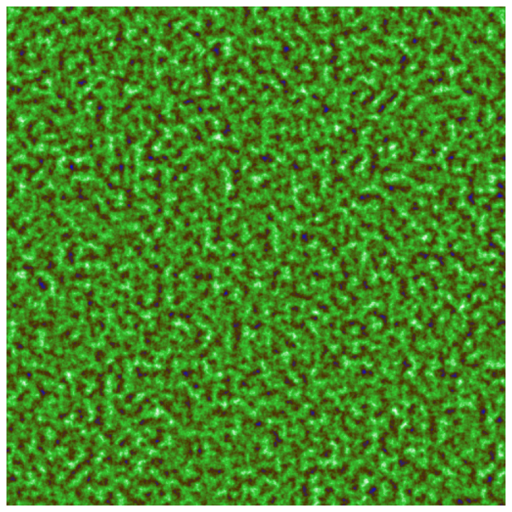

In [14]:

image = load_image('./unknown.PNG').convert('RGB')
image = image.resize((512,512))
image

In [39]:
# pixel_values = image_processor(image, return_tensors="pt").pixel_values
# with torch.no_grad():
#       outputs = image_segmentor(pixel_values)
# seg = image_processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
# color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8) # height, width, 3
# for label, color in enumerate(palette):
#       color_seg[seg == label, :] = color
# color_seg = color_seg.astype(np.uint8)
# image = Image.fromarray(color_seg)
# image

In [15]:
controlnet = ControlNetModel.from_pretrained(
"lllyasviel/sd-controlnet-seg"
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
"runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/20 [00:00<?, ?it/s]

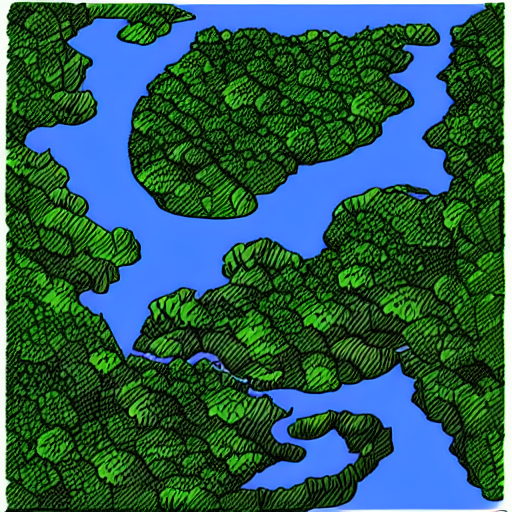

In [16]:
image2 = pipe("Generate this but with blue instead of green", image, num_inference_steps=20).images[0]
image2

  0%|          | 0/20 [00:00<?, ?it/s]

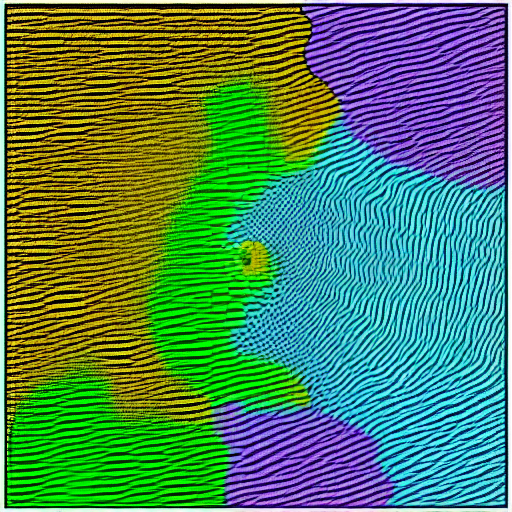

In [17]:
image3 = pipe("Generate the area to the right of this", image, num_inference_steps=20).images[0]
image3

  0%|          | 0/20 [00:00<?, ?it/s]

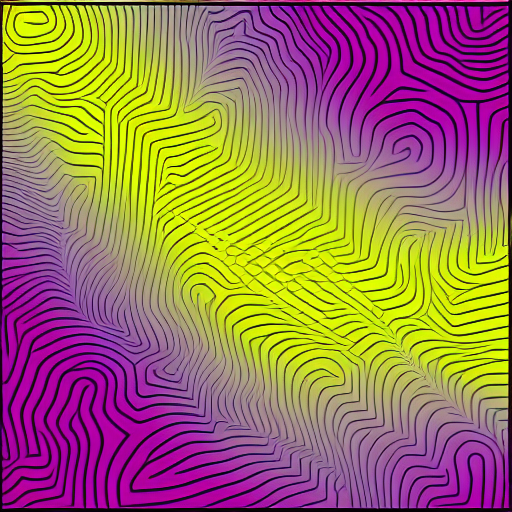

In [18]:
image3 = pipe("Generate another image with the same procedual generation scheme as this", image, num_inference_steps=20).images[0]
image3